In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows=200
pd.options.display.max_columns=200
%matplotlib inline

In [8]:
stats=pd.read_pickle("/Users/irarickman/Google Drive/Data Science/Projects/MLB Projections/Data and Code/lastabs.pkl")

In [9]:
stats.shape

(113427, 93)

In [12]:
stats.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,name_last,name_first,key_mlbam
0,271,FF,2018-07-15,94.6,-1.9246,6.0035,Kelvin Herrera,642708,516969.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,11.0,Amed Rosario pops out to first baseman Matt Ad...,R,R,R,NYM,WSH,X,3.0,popup,1.0,0.0,2018.0,-0.5886,1.2615,-0.3964,4.0081,430832.0,527038.0,408314.0,2.0,9.0,Bot,170.41,182.19,NaN,NaN,446308.0,NaN,180715_205142,5.2799,-137.7668,-2.3427,-8.5990,29.5101,-15.8816,3.5682,1.3048,119.0,83.1,75.345,94.619,2067.0,6.176,530855.0,516969.0,446308.0,571431.0,594694.0,543685.0,607208.0,665742.0,571718.0,594809.0,54.3230,0.000,0.000,0.0,1.0,0.0,0.0,3.0,74.0,2.0,4-Seam Fastball,1.0,6.0,1.0,6.0,6.0,1.0,1.0,6.0,Standard,Standard,rosario,amed,642708
2,289,FT,2018-07-15,97.4,-1.9635,5.8719,Kelvin Herrera,408314,516969.0,single,hit_into_play_no_out,NaN,NaN,NaN,NaN,1.0,Jose Reyes singles on a line drive to left fie...,R,L,R,NYM,WSH,X,NaN,line_drive,2.0,2.0,2018.0,-0.9987,1.0012,-0.3011,2.8505,NaN,430832.0,527038.0,2.0,9.0,Bot,91.92,131.00,NaN,NaN,446308.0,NaN,180715_205045,6.8645,-141.7826,-5.0345,-15.2072,29.2709,-17.4819,2.8623,1.1851,184.0,87.6,10.577,98.774,2211.0,6.821,530855.0,516969.0,446308.0,571431.0,594694.0,543685.0,607208.0,665742.0,571718.0,594809.0,53.6787,0.729,0.731,0.9,1.0,1.0,0.0,4.0,73.0,5.0,2-Seam Fastball,1.0,6.0,1.0,6.0,6.0,1.0,1.0,6.0,Standard,Standard,reyes,jose,408314
7,338,FF,2018-07-15,96.1,-1.9811,5.9953,Kelvin Herrera,519023,516969.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,12.0,Devin Mesoraco lines out to center fielder Bri...,R,R,R,NYM,WSH,X,8.0,line_drive,1.0,0.0,2018.0,-0.9851,0.9673,0.0587,3.0204,NaN,430832.0,527038.0,1.0,9.0,Bot,132.91,66.20,NaN,NaN,446308.0,NaN,180715_204837,7.6289,-139.7159,-4.4779,-14.5900,30.7921,-18.7241,2.8422,1.1248,315.0,83.0,29.788,96.163,2074.0,6.325,530855.0,516969.0,446308.0,571431.0,594694.0,543685.0,607208.0,665742.0,571718.0,594809.0,54.1741,0.036,0.052,0.0,1.0,0.0,0.0,3.0,72.0,2.0,4-Seam Fastball,1.0,6.0,1.0,6.0,6.0,1.0,1.0,6.0,Standard,Standard,mesoraco,devin,519023
9,358,FF,2018-07-15,99.0,-1.8445,6.0749,Kelvin Herrera,527038,516969.0,single,hit_into_play_no_out,NaN,NaN,NaN,NaN,4.0,Wilmer Flores singles on a ground ball to shor...,R,R,R,NYM,WSH,X,NaN,ground_ball,0.0,0.0,2018.0,-0.6200,1.0801,-0.5497,1.9877,NaN,NaN,430832.0,1.0,9.0,Bot,99.76,150.19,NaN,NaN,446308.0,NaN,180715_204711,4.9323,-143.9740,-8.2024,-9.6301,30.8780,-15.6944,3.2645,1.2655,5.0,91.5,-23.026,98.775,2258.0,6.026,530855.0,516969.0,446308.0,571431.0,594694.0,543685.0,607208.0,665742.0,571718.0,594809.0,54.4732,0.140,0.113,0.9,1.0,1.0,0.0,2.0,71.0,1.0,4-Seam Fastball,1.0,6.0,1.0,6.0,6.0,1.0,1.0,6.0,Standard,Standard,flores,wilmer,527038
10,367,FF,2018-07-15,98.2,-2.0033,5.9201,Kelvin Herrera,624424,516969.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,5.0,Michael Conforto flies out to left fielder Jua...,R,L,R,NYM,WSH,X,7.0,fly_ball,1.0,1.0,2018.0,-1.1403,1.0960,0.1358,2.4489,NaN,NaN,430832.0,0.0,9.0,Bot,56.42,64.34,NaN,NaN,446308.0,NaN,180715_2046

In [89]:
## Filtering down fields
keep=['player_name','name_first','name_last','balls','strikes','events','description','launch_speed','estimated_woba_using_speedangle','estimated_ba_using_speedangle']
df=stats[keep]
df['batter_name']=df.name_first.str.capitalize() + " " + df.name_last.str.capitalize()
df.rename(columns={"player_name":"pitcher_name","estimated_woba_using_speedangle":"xwoba","estimated_ba_using_speedangle":"xba"},inplace=True)
df.drop(['name_first','name_last'],axis=1,inplace=True)
df['two_strike']=df.strikes==2
df['hit']=df.events.apply(lambda x: 1 if x in ["single",'double','home_run','triple'] else 0)
df['ab']=df.events.apply(lambda x: 0 if x in ['walk','hit_by_pitch',"caught_stealing_2b","pickoff_caught_stealing_2b",'pickoff_1b','catcher_interf','pickoff_caught_stealing_3b','pickoff_2b','pickoff_caught_stealing_home','caught_stealing_3b','caught_stealing_home',"sac_fly",'sac_bunt','sac_fly_double_play','sac_bunt_double_play'] else 1)

/Users/irarickman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/irarickman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/irarickman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [93]:
## getting players with more than 50 PAs
bat_pas=df.batter_name.value_counts()
batters=bat_pas[bat_pas>100].index.tolist()

In [145]:
## function to filter for me
def two_strikes(nms, pos, met):
    d=df[df[pos].isin(nms)]
    if met=="avg":
        av=d[[pos,"two_strike",'hit','ab']].groupby([pos,'two_strike']).sum()
        av['avg']=av.hit/av.ab.astype(float)
        av.reset_index(inplace=True)
        a=av.pivot(pos,"two_strike",'avg')
        a['diff']=a[False]-a[True]
        return a.sort_values(['diff'])
    elif met=="xwoba":
        av=d[[pos,"two_strike",'xwoba']].groupby([pos,'two_strike']).mean()
        av.reset_index(inplace=True)
        a= av.pivot(pos,"two_strike",'xwoba')
        a['diff']=a[False]-a[True]
        return a.sort_values(['diff'])
    elif met=="launch_speed":
        av=d[[pos,"two_strike",'launch_speed']].groupby([pos,'two_strike']).mean()
        av.reset_index(inplace=True)
        a=av.pivot(pos,"two_strike",'launch_speed')
        a['diff']=a[False]-a[True]
        return a.sort_values(['diff'])
    elif met=="xba":
        av=d[[pos,"two_strike",'xba']].groupby([pos,'two_strike']).mean()
        av.reset_index(inplace=True)
        a= av.pivot(pos,"two_strike",'xba')
        a['diff']=a[False]-a[True]
        return a.sort_values(['diff'])
    elif met=="hits":
        av=d[[pos,"two_strike",'hit']].groupby([pos,'two_strike']).sum()
        av.reset_index(inplace=True)
        a=av.pivot(pos,"two_strike","hit")
        return a
    elif met=="abs":
        av=d[[pos,"two_strike",'ab']].groupby([pos,'two_strike']).sum()
        av.reset_index(inplace=True)
        a=av.pivot(pos,"two_strike","ab")
        return a

In [146]:
two_strikes(batters, 'batter_name','abs').sort_values([True])

two_strike,False,True
batter_name,,
Matt Wieters,55,39
Daniel Murphy,56,40
Corey Seager,58,43
Tommy La stella,64,44
Rosell Herrera,50,46
Rob Refsnyder,37,47
Tony Kemp,73,48
Bryan Holaday,52,48
Pat Valaika,49,49


In [105]:
df_avg.head()

two_strike,False,True,diff
batter_name,,,
Andrelton Simmons,0.303571,0.300885,0.002686
David Freese,0.298507,0.284091,0.014417
Elias Diaz,0.301205,0.285714,0.015491
Chase Utley,0.258065,0.240000,0.018065
Martin Prado,0.227273,0.203125,0.024148


In [111]:
df_avg=two_strikes(batters, 'batter_name','avg')
df_k=df[df.events.str.contains("strikeout")][['batter_name','events']].groupby(['batter_name']).count()
df_k.rename(columns={"events":'strikeouts'},inplace=True)
df_bb=df[df.events.str.contains("walk")][['batter_name','events']].groupby(['batter_name']).count()
df_bb.rename(columns={"events":'walks'},inplace=True)
df_avg_plus=df_avg.merge(df_k,how='left',right_index=True,left_index=True).merge(df_bb, how='left',left_index=True,right_index=True)

In [125]:
len(df_avg_plus.strikeouts),len(df_avg_plus['diff'])

(380, 380)

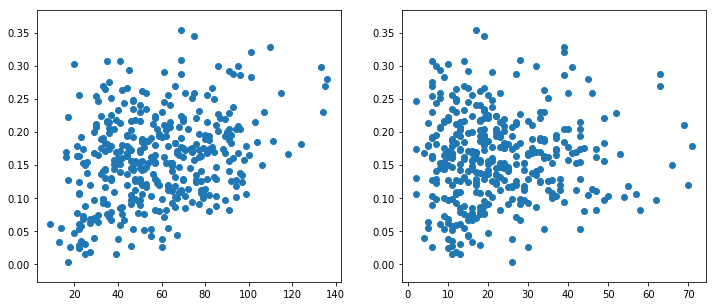

In [142]:
## scatter of difference against strikeouts
p=plt.figure(figsize=(12,5))
ax1=p.add_subplot(121)
ax1.scatter(df_avg_plus.strikeouts, df_avg_plus['diff'])
ax2=p.add_subplot(122)
ax2.scatter(df_avg_plus.walks, df_avg_plus['diff'])

In [96]:
two_strikes(batters, "batter_name",'launch_speed')

two_strike,False,True,diff
batter_name,,,
Roberto Perez,82.806383,93.442857,-10.636474
Bradley Zimmer,84.416667,93.392857,-8.976190
Delino Deshields,75.596000,83.482222,-7.886222
Franchy Cordero,90.745161,97.708696,-6.963534
Domingo Santana,86.883146,93.351429,-6.468283
Jake Marisnick,82.651923,89.080556,-6.428632
Guillermo Heredia,81.687705,88.009091,-6.321386
Greg Garcia,81.343860,86.839394,-5.495534
Jarrod Dyson,79.200000,84.622581,-5.422581


In [97]:
two_strikes(batters, "batter_name",'xwoba')

two_strike,False,True,diff
batter_name,,,
Hunter Dozier,0.308253,0.518462,-0.210208
Mikie Mahtook,0.231326,0.395273,-0.163947
Tyler Austin,0.488568,0.640320,-0.151752
Franchy Cordero,0.498855,0.648261,-0.149406
Chance Sisco,0.344839,0.481226,-0.136387
Bradley Zimmer,0.405667,0.540000,-0.134333
Carlos Gonzalez,0.332034,0.462607,-0.130572
J. p. Crawford,0.322289,0.443792,-0.121502
Andrew Knapp,0.412208,0.529818,-0.117611


In [98]:
two_strikes(batters, "batter_name",'xba')

two_strike,False,True,diff
batter_name,,,
Hunter Dozier,0.257380,0.416846,-0.159466
Mikie Mahtook,0.229465,0.378485,-0.149020
Chance Sisco,0.287786,0.419645,-0.131859
Tyler Austin,0.359659,0.477840,-0.118181
Jordy Mercer,0.306088,0.403931,-0.097844
Bradley Zimmer,0.338542,0.433429,-0.094887
Pat Valaika,0.208420,0.297636,-0.089216
Carlos Gonzalez,0.302356,0.389852,-0.087496
Franchy Cordero,0.412016,0.498043,-0.086027
